# **Lasso Regression for the CDK2 K<sub>i</sub> Dataset**

This Jupyter Notebook builds a regression model using the Lasso (Least Absolute Shrinkage and Selection Operator) method ([Géron, 2023](https://www.isbns.net/isbn/9781098125974/)) for data from the CDK2 K<sub>i</sub> dataset ([de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449)). This code employs the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class from the [Scikit-Learn](https://scikit-learn.org/stable/) library ([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490)) to generate a regression model. It evaluates the model's predictive performance using metrics recommended by [Walsh et al., 2021](https://doi.org/10.1038/s41592-021-01205-4) and de [Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449).
<br></br>
<img src="https://drive.usercontent.google.com/download?id=1uuzsduNcMk6qtSBxEfbR6QnYi2veNVqt&export=view&authuser=0" width=800 alt="PDB: 2A4L">
<br><i>Structure of a protein-ligand complex ([de Azevedo et al., 1997](https://doi.org/10.1111/j.1432-1033.1997.0518a.x)) with an inhibitor bound to the macromolecule (PDB access code: [2A4L](https://www.rcsb.org/structure/2A4L)).</i></br>
<br></br>
**References**
<br></br>
De Azevedo WF, Leclerc S, Meijer L, Havlicek L, Strnad M, Kim SH. Inhibition of cyclin-dependent kinases by purine analogues: crystal structure of human cdk2 complexed with roscovitine. Eur J Biochem. 1997; 243(1-2): 518-26.
PMID: 9030780.
[DOI: 10.1111/j.1432-1033.1997.0518a.x](https://doi.org/10.1111/j.1432-1033.1997.0518a.x)
<br></br>
De Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF,
Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR, Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S. SAnDReS 2.0: Development of machine-learning models to explore the scoring function space. J Comput Chem. 2024; 45(27): 2333-2346.
PMID: 38900052. [DOI: 10.1002/jcc.27449](https://doi.org/10.1002/jcc.27449) [PubMed](https://pubmed.ncbi.nlm.nih.gov/38900052/)
<br></br>
Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e: Concepts, Tools, and Techniques to Build Intelligent Systems, 3rd ed.; O’Reilly Media: Sebastopol, CA, 2023.
[ISBN: 978-1-098-12597-4](https://www.isbns.net/isbn/9781098125974/)
<br></br>
Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A, Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine Learning in Python. J Mach Learn Res., 2011; 12:2825–2830. [DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)
<br></br>
Walsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; ELIXIR Machine Learning Focus Group; Harrow J, Psomopoulos FE, Tosatto SCE. DOME: recommendations for supervised machine learning validation in biology. Nat Methods. 2021; 18(10): 1122-1127. [DOI: 10.1038/s41592-021-01205-4](https://doi.org/10.1038/s41592-021-01205-4) [PubMed](https://pubmed.ncbi.nlm.nih.gov/34316068/)
<br></br>

It follows the complete Python code.





Generating regression model with Lasso...done

Writing metrics to file: regression_metrics.csv...done

Saving scatter plot to file: test_set_scatter_plot.pdf...

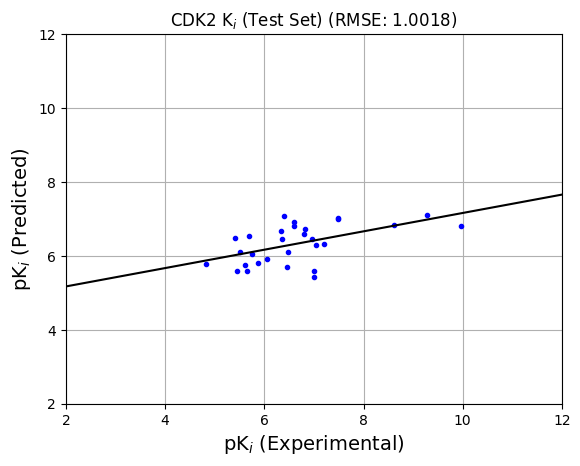

done!

Parameter vector 
Intercept:  6.3275
Coefficients:  [ 0.17717471  0.2849209  -0.24398545  0.          0.07118948]

Writing predictions to file: cdk2_ki_test_set_Lasso_predictions.csv...done!


In [ ]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# July 20, 2024                                                                #
################################################################################
#
################################################################################
# Import section                                                               #
################################################################################
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso

################################################################################
# Define cross_validation() function                                           #
################################################################################
# Function to set up k-fold class. Kfold class to build a n fold
# cross-validation loop and test the generalization ability of regression. With
# cross-validation, we generally obtain a more conservative estimate(that is,
# the error is larger). The cross-validation estimate is a better estimate of
# how well we could generalize to predict on unseen data.
#
################################################################################
# Reference                                                                    #
################################################################################
# Coelho LP, Richert W. (2015) Building Machine Learning Systems with
# Python. 2nd ed. Packt Publishing Ltd. Birmingham UK. 301 pp. See page 162
# (Cross-validation for regression)
def cross_validation(model,X,y,n_splits,random_state,verbose):

    # Import section
    from sklearn.model_selection import KFold, cross_val_score
    from warnings import simplefilter
    import numpy as np

    # Set up k-fold class
    kf = KFold(n_splits=n_splits,shuffle=True, random_state=random_state)

    # Ignore all future warnings
    simplefilter(action='ignore', category=DeprecationWarning)

    # Looping through kf.split()
    for train,test in kf.split(X):

        # Generate regression model
        model.fit(X[train],y[train])

    # Show Walsh metrics if requestes
    if verbose:
        # Show average coefficient of determination using n-fold crossvalidation
        scores = cross_val_score(model,X,y,cv=kf)
        msg_out = "Average coefficient of determination using n-fold "
        msg_out += "cross-validation"
        print("\n"+msg_out+":",np.mean(scores))

    # Return model
    return model

################################################################################
# Define Walsh_and_de_Azevedo_regression_metrics() function                    #
################################################################################
def Walsh_and_de_Azevedo_regression_metrics(y,y_pred):
    """Function to calculate regression metrics as recommended by
    [Walsh et 2021](https://pubmed.ncbi.nlm.nih.gov/34316068/)
    and
    [de Azevedo Jr et al., 2024](https://pubmed.ncbi.nlm.nih.gov/38900052/))

    Parameters:
    y: array with experimental data (dimensions: (n,) )
    y_pred: array with predicted values (dimensions: (n,) )

    where n is the number of instances
    """

    # Import section for this function
    from sklearn.metrics import median_absolute_error
    from scipy import stats
    import numpy as np

    # Determine metrics
    n = len(y)
    y_bar = y.mean()
    rss = np.sum( np.square(y_pred - y) )
    rmse =  np.sqrt( (np.sum( (y - y_pred)**2 ))/n )
    ss_res = np.sum( (y - y_pred)**2 )
    ss_tot = np.sum( (y - y_bar)**2 )
    R2 = 1 - ss_res/ss_tot
    mae = median_absolute_error(y,y_pred)
    r_pearson,p_pearson = stats.pearsonr(y,y_pred)
    rho,p_spearman = stats.spearmanr(y,y_pred)
    core_dome = rmse**2 + mae**2 + (R2 -1)**2
    dome =    np.sqrt( core_dome )
    edomer2 = np.sqrt( core_dome + (r_pearson**2 - 1)**2 )
    edomerho =np.sqrt( core_dome + (rho**2 - 1)**2 )
    edome =   np.sqrt( core_dome + (r_pearson**2 - 1)**2 + (rho**2 - 1)**2 )

    # Return metrics
    return r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,edomer2,\
    edomerho,edome

################################################################################
# Define write_Walsh_and_de_Azevedo_regression_metrics() function              #
################################################################################
def write_Walsh_and_de_Azevedo_regression_metrics(y_train,y_train_pred,y_test,
                                                        y_test_pred,csv_out):

    # Set up lists
    y_list = [y_train,y_test]
    y_pred_list = [y_train_pred,y_test_pred]
    data_list = ["Training Set","Test Set"]

    # Set up empty string
    data_out = "Data,n,r,p-value(r),r2,rho,p-value(rho),RSS,RMSE,MAE,R2,DOME,"
    data_out += "EDOMEr2,EDOMErho,EDOME\n"

    # Looping through data
    for count,y in enumerate(y_list):

        # Call Walsh_and_de_Azevedo_regression_metrics() function
        r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,edomer2,\
        edomerho,edome = \
        Walsh_and_de_Azevedo_regression_metrics(y_list[count],
                                                            y_pred_list[count])

        # Set up output line
        line_out = data_list[count]+","+str(len(y))+","
        line_out+= "{:.4f}".format(r_pearson)+","+"{:.4e}".format(p_pearson)+","
        line_out += "{:.4f}".format(r_pearson**2)+","+"{:.4f}".format(rho)+","
        line_out += "{:.4e}".format(p_spearman)+","+"{:.4e}".format(rss)+","
        line_out += "{:.4f}".format(rmse)+","+"{:.4f}".format(mae)+","
        line_out += "{:.4f}".format(R2)+","+"{:.4f}".format(dome)+","
        line_out += "{:.4f}".format(edomer2)+","+"{:.4f}".format(edomerho)+","
        line_out += "{:.4f}".format(edome)

        # Update data_out
        data_out += line_out+"\n"

    # Open a new file and write data_out
    fo_out = open(csv_out,"w")
    fo_out.write(data_out)
    fo_out.close()

    # Return rmse
    return rmse

################################################################################
# Define scatter_plot() function                                               #
################################################################################
def scatter_plot(y,y_pred,data_in,color_in,color_reg,plt_out,x_l,y_l,title,
                 xlim,ylim,dpi):
    """Function to generate a basic scatter plot"""

    # Import section
    import numpy as np
    import matplotlib.pyplot as plt

    # Create basic scatterplot
    plt.plot(y, y_pred,data_in,color=color_in)

    # Obtain m (slope) and b(intercept) of Lasso regression line
    m, b = np.polyfit(y,y_pred, 1)

    y_in = np.linspace(xlim[0], xlim[1], 100)

    # Use color_reg as color for regression line
    plt.plot(y_in, m*y_in+b, color=color_reg)
    plt.xlabel(x_l,fontsize = 14)
    plt.ylabel(y_l,fontsize = 14)
    plt.title(title,fontsize = 12)
    plt.xlim( xlim )
    plt.ylim( ylim )
    plt.grid()
    plt.savefig(plt_out,dpi=dpi)
    plt.show()

################################################################################
# Training set                                                                 #
################################################################################
file_in = "cdk2_ki_training_set.csv"             # Update here for a new dataset
print("\nDownloading and preprocessing file: "+file_in,end="...")
url = "https://bit.ly/CDK2_Ki_Training_Set"      # Update here for a new dataset
feature_list =["Hydrogen","Average Q","C","N",
                                            "O"]# Update here for a new dataset
#feature_list =["Hydrogen","Average Q","C","O"]   # Update here for a new dataset
data = pd.read_csv(url,delimiter=",")
X_train = data[feature_list]
y_train = data.iloc[:,8]                         # Update here for a new dataset
scaler_train = preprocessing.StandardScaler().fit(X_train)
X_train = scaler_train.transform(X_train)
print("done!")

################################################################################
# Test set                                                                     #
################################################################################
file_in = "cdk2_ki_test_set.csv"                 # Update here for a new dataset
print("\nDownloading and preprocessing file: "+file_in,end="...")
url = "https://bit.ly/CDK2_Ki_Test_Set"          # Update here for a new dataset
data = pd.read_csv(url,delimiter=",")
X_test = data[feature_list]                      # Update here for a new dataset
y_test = data.iloc[:,8]                          # Update here for a new dataset
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test = scaler_test.transform(X_test)
print("done!")

################################################################################
# Define additional inputs                                                     #
################################################################################
plt_scatter_X_label_str,plt_scatter_y_label_str = "pK$_i$ (Experimental)",\
                        "pK$_i$ (Predicted)"            # Define labels for axes
plt_dpi = 1500                                          # Plot dpi

################################################################################
# Build a regression model with Lasso                                          #
################################################################################
msg_out = "\nGenerating regression model with Lasso"
print(msg_out,end="...")
lin_reg = Lasso(
alpha = 0.04,
copy_X = True,
fit_intercept = True,
max_iter = 100,
positive = False,
precompute = False,
random_state = 42,
selection = "cyclic",
tol = 0.5,
warm_start = False
).fit(X_train, y_train)

# Call cross_validation() function
lin_reg = cross_validation(lin_reg,X_train,y_train,5,46,False)
y_train_pred_reg = lin_reg.predict(X_train)
y_test_pred_reg = lin_reg.predict(X_test)
print("done")

# Call write_Walsh_and_de_Azevedo_regression_metrics() function
print("\nWriting metrics to file: regression_metrics.csv",end="...")
csv_out = "regression_metrics.csv"
rmse = write_Walsh_and_de_Azevedo_regression_metrics(y_train,y_train_pred_reg,
                                                y_test,y_test_pred_reg,csv_out)
print("done")

# Call scatter_plot() function
print("\nSaving scatter plot to file: test_set_scatter_plot.pdf",end="...")
plt_scatter_title_str = "CDK2 K$_i$ (Test Set)"  # Update here for a new dataset
plt_scatter_title_str += " (RMSE: {:.4f}".format(rmse)+")"
plot_out = "test_set_scatter_plot.pdf"
xlim = (2.0, 12.0)                               # Update here for a new dataset
ylim = (2.0, 12.0)                               # Update here for a new dataset
scatter_plot(y_test,y_test_pred_reg,".","blue","black",plot_out,
plt_scatter_X_label_str,plt_scatter_y_label_str,plt_scatter_title_str,xlim,
             ylim,plt_dpi)
print("done!")

# Show parameter vector
print("\nParameter vector ")
print("Intercept:  {:.4f}".format(lin_reg.intercept_))
print("Coefficients: ",lin_reg.coef_)

################################################################################
# Open a new file with predicted values                                        #
################################################################################
file_predictions = file_in.replace(".csv","_Lasso_predictions.csv")
print("\nWriting predictions to file: "+file_predictions,end="...")
fo_new =  open(file_predictions,"w")
data_out ="pKi(Experimental),pKi(Predicted)\n"
for count in range(len(y_test)):
    data_out += str(y_test[count])+","+str(y_test_pred_reg[count])+"\n"
fo_new.write(data_out)
fo_new.close()
print("done!")
################################################################################